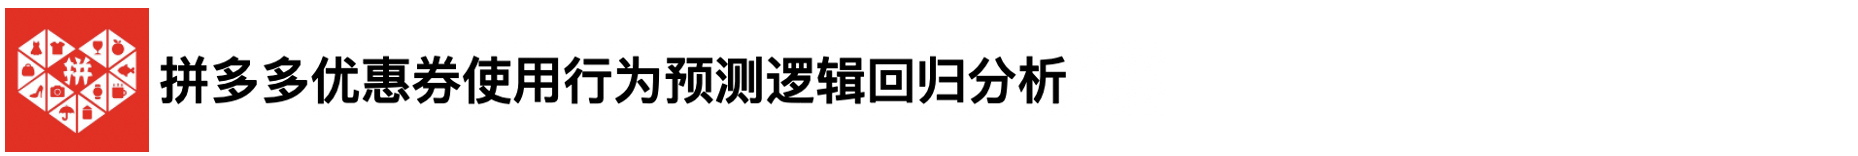

# 1 项目背景

拼多多是国内主流的手机购物APP，成立于2015年9月，用户通过发起和朋友、家人、邻居等的拼团，以更低的价格，拼团购买商品。拼多多作为新电商开创者，致力于将娱乐社交的元素融入电商运营中，通过“社交+电商”的模式，让更多的用户带着乐趣分享实惠，享受全新的共享式购物体验。对于各大电商平台，在“双十一”这种大促时间段，优惠券会起到非常大的促销作用。

业务委托：如何找到更容易使用优惠券的用户，对他们进行进准推送与营销，从而在双十一期间使销售额大大提升？

# 2 业务问题与分析思路

业务问题的定义，采取What-Why-How的逻辑框架对业务问题进行递进式拆析，其中，What是问题的表象，Why是导致表象的深层原因，How是针对原因所提出的改善表象的对策建议。据此所定义的业务问题为：

What：如何找到更容易使用优惠券的用户？

Why：样本属性如何？决定用户是否使用优惠券的因素有哪些？如何基于已有数据建立用户优惠券使用行为的预测模型？如何评估模型的预测能力？

思路：
1. 数据清洗、探索与预处理：从整体把握数据，并刻画出拼多多使用优惠券的主力群体画像
2. 影响因素分析：定量化各属性变量与是否使用优惠券的相关关系，找出影响因子，为后续建立预测模型做准备
3. 预测模型建立：
    1. 模型选择：预测目标变量（是否使用优惠券）是二分类变量，属于分类问题，因此选择逻辑回归模型
    2. 建模训练：由于要建立使用优惠券行为的预测模型，需要将样本分为训练集和测试集，以验证模型的预测能力（同时可以防止模型出现过拟合现象）
    3. 模型评估与优化：
        1. 通过调整变量对模型进行优化 
        2. 采用准确率（Accuracy）指标评估模型的拟合程度 
        3. 用模型预测测试集数据，并采用准确率指标评估模型预测能力
        4. 通过调整训练集与测试集比例、增减变量等方法，根据模型评估指标优化模型

# 3 结论与业务建议

## 3.1 主要结论
1. 优惠券使用主力画像（对优惠券使用总量贡献较大的分组群体）：28~38岁、已婚、有收入、无信用卡违约、无退货经历、没有使用信用卡付款、过去6个月使用过1~2次优惠券、过去1个月使用过1次优惠券


2. 使用优惠券的影响因素：建模变量主要选择相关系数的绝对值在0.1以上。经过模型评估与优化，最终纳入的变量为：'coupon_used_in_last_month_new_[0, 1)'、'returned_no'、'job_new_non_income'
    
    
3. 建模结果：
    1. 最优模型为：logit(p) = log(p/(1-p)) = -1.71955696-1.17750583 * coupon_used_in_last_month_new_[0, 1) +0.95882332 * returned_no+0.47473601 * job_new_non_income
    2. 模型解读：
        1. 上个月使用过优惠券的群体，这次活动使用优惠券的概率，是上个月未使用过优惠券的群体3倍；
        2. 没退货经历的群体，这次活动使用优惠券的概率，是有退货经历群体的2.61倍；
        3. 没有收入的群体，这次活动使用优惠券的概率，是有收入群体的1.61倍。
    3. 最优模型的拟合程度与预测准确率分别达0.883512和0.882072。

## 3.2 业务建议

派发优惠券的方案有两个：
1. 预算较少的情况下，依据概率模型精准投放：对上个月使用过优惠券、没有退货经历、没有收入（学生、无业、退休）群体投放优惠券，根据模型这些群体使用优惠券的概率最高。


2.  预算较多的情况下，还可以依据优惠券使用主力画像大量投放：依据模型概率投放有个问题，即优惠券使用概率较高的群体基数可能较小，而优惠券使用概率相对较低的群体，可能由于基数较多得到较高的整体优惠券使用总量，这也能提高整体的销售额。

# 4 数据分析与建模

## 4.1 数据清洗、探索与预处理

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

# 导入数据
pdd = pd.read_csv('hw3_PDD.csv')
# 查看数据属性，检查空值
print('数据属性信息：')
print(pdd.info(),end='\n\n')
# 检查是否有重复值
print('重复行数：')
print(pdd.duplicated().sum())
# 检查异常值
pdd.describe()

数据属性信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
ID                            25317 non-null int64
age                           25317 non-null int64
job                           25317 non-null object
marital                       25317 non-null object
default                       25317 non-null object
returned                      25317 non-null object
loan                          25317 non-null object
coupon_used_in_last6_month    25317 non-null int64
coupon_used_in_last_month     25317 non-null int64
coupon_ind                    25317 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.9+ MB
None

重复行数：
0


,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


###### 小结
1. 共25317行数据，10个属性变量（9个自变量，1个目标变量），无缺失值，无重复行，无异常值（age最大值为95，80以上的占比仅为0.28%，一方面符合正态分布，确实有可能存在少量大龄用户，另一方面数据量较小，影响也较小，因此从统计学角度可以不看做异常值）。其中ID属性对业务无意义，可以选择删除。
2. 属性字典：
    1. 目标属性变量：coupon_ind:在本次活动中是否使用优惠券
    2. 用户属性变量：
        1. age：年龄
        2. job：职业
        3. maritial：婚姻状态
    3. 消费行为属性变量：
        1. default：信用卡是否违约
        2. returned：是否有过退货
        3. loan：是否使用信用卡付款
    4. 使用优惠券行为属性变量
        4. coupon_used_in_last6_month：过去6个月使用的优惠券数量
        5. coupon_used_in_last_month：过去1个月使用的优惠券数量

In [2]:
# 删除无用变量
pdd.drop('ID', axis=1, inplace=True)

# 通过查看类别型变量，发现job存在‘unknown’这一无意义值（其他变量不存在），比例为0.6%，为不影响后续分析，做删除处理
pdd = pdd[pdd['job'] != 'unknown']

In [3]:
# 观察目标变量，使用优惠券的比例为11.692%，未使用的比例为88.308%
pdd['coupon_ind'].value_counts(1)

0    0.88308
1    0.11692
Name: coupon_ind, dtype: float64

## 4.2 用户属性对使用优惠券行为的影响

Text(0, 0.5, ' ')

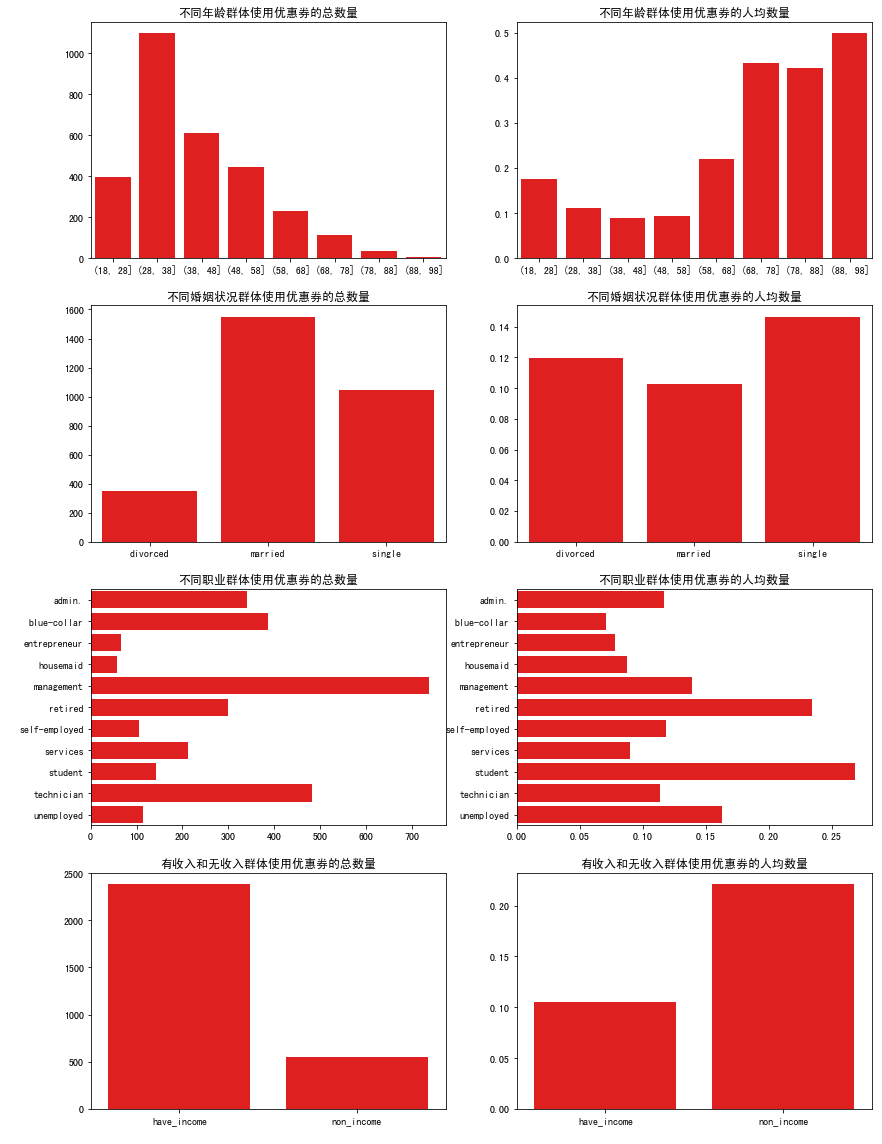

In [4]:
# 不同年龄群体使用优惠券的总数量
# 增加新变量'age_new'，将年龄以10为间隔分组
plt.figure(figsize=(14,20))
plt.subplot(421)
bins = range(18,99,10)
pdd['age_new'] = pd.cut(pdd['age'],bins=bins)
data = pdd.copy()
data = data.groupby(['age_new'])[['coupon_ind']].sum().reset_index()
sns.barplot(x='age_new', y='coupon_ind', data=data, color='red')
plt.title('不同年龄群体使用优惠券的总数量')
plt.xlabel(' ')
plt.ylabel(' ')
# 不同年龄群体使用优惠券的人均数量
plt.subplot(422)
data = pdd.copy()
data = data.groupby(['age_new'])[['coupon_ind']].mean().reset_index()
sns.barplot(x='age_new', y='coupon_ind', data=data, color='red')
plt.title('不同年龄群体使用优惠券的人均数量')
plt.xlabel(' ')
plt.ylabel(' ')

# 不同婚姻状况群体使用优惠券的总数量
data = pdd.copy()
data = data.groupby(['marital'])[['coupon_ind']].sum().reset_index()
plt.subplot(423)
sns.barplot(x='marital', y='coupon_ind', data=data, color='red')
plt.title('不同婚姻状况群体使用优惠券的总数量')
plt.xlabel(' ')
plt.ylabel(' ')
# 不同婚姻状况群体使用优惠券的人均数量
data = pdd.copy()
data = data.groupby(['marital'])[['coupon_ind']].mean().reset_index()
plt.subplot(424)
sns.barplot(x='marital', y='coupon_ind', data=data, color='red')
plt.title('不同婚姻状况群体使用优惠券的人均数量')
plt.xlabel(' ')
plt.ylabel(' ')

# 不同职业群体使用优惠券的总数量
data = pdd.copy()
data = data.groupby(['job'])[['coupon_ind']].sum().reset_index()
plt.subplot(425)
sns.barplot(y='job', x='coupon_ind', data=data, color='red')
plt.title('不同职业群体使用优惠券的总数量')
plt.xlabel(' ')
plt.ylabel(' ')
# 不同职业群体使用优惠券的人均数量
data = pdd.copy()
data = data.groupby(['job'])[['coupon_ind']].mean().reset_index()
plt.subplot(426)
sns.barplot(y='job', x='coupon_ind', data=data, color='red')
plt.title('不同职业群体使用优惠券的人均数量')
plt.xlabel(' ')
plt.ylabel(' ')

# 有收入和无收入群体使用优惠券的总数量
# 考虑到是否有收入可能会对优惠券使用行为产生差异，构建衍生变量'job_new',将职业划分为有收入、无收入、未知三个群体
non_income = ['retired','unemployed','student']
pdd['job_new'] = pdd['job'].apply(lambda x:'non_income' if x in non_income else 'have_income')
data = pdd.copy()
data = data.groupby(['job_new'])[['coupon_ind']].sum().reset_index()
plt.subplot(427)
sns.barplot(x='job_new', y='coupon_ind', data=data, color='red')
plt.title('有收入和无收入群体使用优惠券的总数量')
plt.xlabel(' ')
plt.ylabel(' ')

# 有收入和无收入群体使用优惠券的人均数量
data = pdd.copy()
data = data.groupby(['job_new'])[['coupon_ind']].mean().reset_index()
plt.subplot(428)
sns.barplot(x='job_new', y='coupon_ind', data=data, color='red')
plt.title('有收入和无收入群体使用优惠券的人均数量')
plt.xlabel(' ')
plt.ylabel(' ')

##### 小结
1. 年龄：整体呈现随年龄增长优惠券使用总量减少的趋势，但是人均优惠券使用量则相反，随着年龄增加而增加；
2. 婚姻状况：从优惠券使用总量为 已婚>单身>离异，而人均优惠券使用量趋势为 单身>离异>已婚；
3. 职业：分类较多，规律不明显，但可以发现一个规律，人均优惠券使用量较大的群体可以被归结为无收入群体，因此对该变量进行衍生变量处理
4. 有无收入：来源于'job'变量，可以得到有收入群体的优惠券使用总量远大于无收入群体，而从人均优惠券使用量角度看，无收入群体的人均使用量约为有收入群体的2倍
5. 优惠券使用主力群体：28~38岁、已婚、有收入群体

## 4.3 用户消费行为对使用优惠券行为的影响

Text(0, 0.5, ' ')

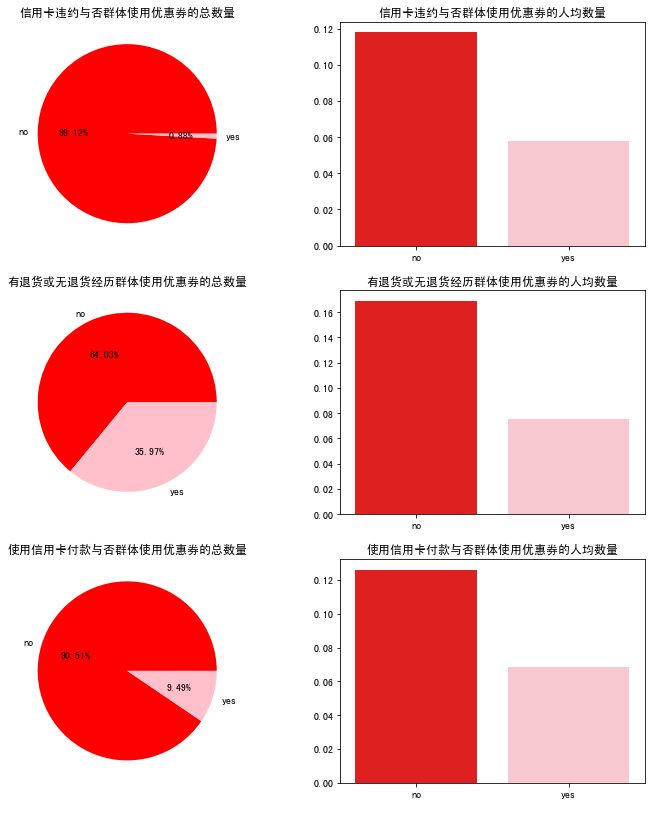

In [24]:
# 信用卡违约与否群体使用优惠券的总数量
plt.figure(figsize=(12,14))
data = pdd.copy()
data = data.groupby(['default'])[['coupon_ind']].sum().reset_index()
plt.subplot(321)
plt.pie(data['coupon_ind'], autopct = '%0.2f%%' , labels = data['default'], colors=('red', 'pink'))
plt.title('信用卡违约与否群体使用优惠券的总数量')
# 信用卡违约与否群体使用优惠券的人均数量
data = pdd.copy()
data = data.groupby(['default'])[['coupon_ind']].mean().reset_index()
plt.subplot(322)
sns.barplot(x='default', y='coupon_ind', data=data, palette=('red', 'pink'))
plt.title('信用卡违约与否群体使用优惠券的人均数量')
plt.xlabel(' ')
plt.ylabel(' ')

# 有退货或无退货经历群体使用优惠券的总数量
data = pdd.copy()
data = data.groupby(['returned'])[['coupon_ind']].sum().reset_index()
plt.subplot(323)
plt.pie(data['coupon_ind'], autopct = '%0.2f%%' , labels = data['returned'], colors=('red', 'pink'))
plt.title('有退货或无退货经历群体使用优惠券的总数量')
# 有退货或无退货经历群体使用优惠券的人均数量
data = pdd.copy()
data = data.groupby(['returned'])[['coupon_ind']].mean().reset_index()
plt.subplot(324)
sns.barplot(x='returned', y='coupon_ind', data=data, palette=('red', 'pink'))
plt.title('有退货或无退货经历群体使用优惠券的人均数量')
plt.xlabel(' ')
plt.ylabel(' ')


# 使用信用卡付款与否群体使用优惠券的总数量
data = pdd.copy()
data = data.groupby(['loan'])[['coupon_ind']].sum().reset_index()
plt.subplot(325)
plt.pie(data['coupon_ind'], autopct = '%0.2f%%' , labels = data['loan'], colors=('red', 'pink'))
plt.title('使用信用卡付款与否群体使用优惠券的总数量')
# 使用信用卡付款与否群体使用优惠券的人均数量
data = pdd.copy()
data = data.groupby(['loan'])[['coupon_ind']].mean().reset_index()
plt.subplot(326)
sns.barplot(x='loan', y='coupon_ind', data=data, palette=('red', 'pink'))
plt.title('使用信用卡付款与否群体使用优惠券的人均数量')
plt.xlabel(' ')
plt.ylabel(' ')

##### 小结：
1. 信用卡违约情况：无信用卡违约群体的优惠券使用总量与人均使用量均高于有信用卡违约群体
2. 有无退货经历：无退货经历群体的优惠券使用总量与人均使用量均高于有退货经历群体
3. 是否使用信用卡付款：不使用信用卡付款群体的优惠券使用总量与人均使用量均高于使用信用卡付款群体
4. 优惠券使用主力群体：无信用卡违约、无退货经历、没有使用信用卡付款

## 4.4 用户以往使用优惠券行为对本次使用优惠券行为的影响

Text(0, 0.5, ' ')

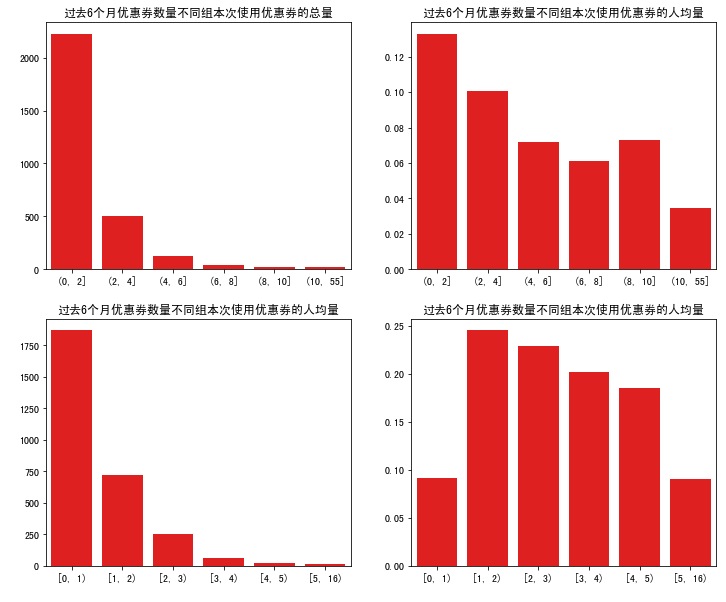

In [5]:
# 过去6个月优惠券数量不同组本次使用优惠券的总量
# 通过value_counts()观察变量，发现80%以上的数据主要集中在10次以内，因此对该变量重新分组
pdd['coupon_used_in_last6_month_new'] = pd.cut(pdd['coupon_used_in_last6_month'], bins=[0,2,4,6,8,10,55])
plt.figure(figsize=(12,10))
plt.subplot(221)
data = pdd.copy()
data = data.groupby(['coupon_used_in_last6_month_new'])[['coupon_ind']].sum().reset_index()
sns.barplot(x='coupon_used_in_last6_month_new', y='coupon_ind', data=data, color = 'red')
plt.title('过去6个月优惠券数量不同组本次使用优惠券的总量')
plt.xlabel(' ')
plt.ylabel(' ')
# 过去6个月优惠券数量不同组本次使用优惠券的人均量
data = pdd.copy()
data = data.groupby(['coupon_used_in_last6_month_new'])[['coupon_ind']].mean().reset_index()
plt.subplot(222)
sns.barplot(x='coupon_used_in_last6_month_new', y='coupon_ind', data=data, color = 'red')
plt.title('过去6个月优惠券数量不同组本次使用优惠券的人均量')
plt.xlabel(' ')
plt.ylabel(' ')

# 过去1个月优惠券数量不同组本次使用优惠券的总量
# 通过value_counts()观察变量，发现80%以上的数据主要集中在5次以内，因此对该变量重新分组
pdd['coupon_used_in_last_month_new'] = pd.cut(pdd['coupon_used_in_last_month'], bins=[0,1,2,3,4,5,16], right=False)
data = pdd.copy()
data = data.groupby(['coupon_used_in_last_month_new'])[['coupon_ind']].sum().reset_index()
plt.subplot(223)
sns.barplot(x='coupon_used_in_last_month_new', y='coupon_ind', data=data, color = 'red')
plt.title('过去6个月优惠券数量不同组本次使用优惠券的人均量')
plt.xlabel(' ')
plt.ylabel(' ')
# 过去1个月优惠券数量不同组本次使用优惠券的人均量
data = pdd.copy()
data = data.groupby(['coupon_used_in_last_month_new'])[['coupon_ind']].mean().reset_index()
plt.subplot(224)
sns.barplot(x='coupon_used_in_last_month_new', y='coupon_ind', data=data, color = 'red')
plt.title('过去6个月优惠券数量不同组本次使用优惠券的人均量')
plt.xlabel(' ')
plt.ylabel(' ')

##### 小结
1. 过去6个月使用优惠券数量：过去6个月使用优惠券数量越少的群体，该次活动使用优惠券的总量与人均量越多；
2. 过去1个月使用优惠券数量：过去1个月没有使用优惠券的群体，该次活动使用优惠券的总量最多，但是人均量最少；过去1个月使用优惠券数量越少的群体（除了0），该次活动使用优惠券的总量与人均量越多
3. 优惠券使用主力群体：过去6个月使用过1~2次优惠券、过去1个月使用过1次优惠券

## 4.5 相关分析

### 4.5.1 组间差异可视化

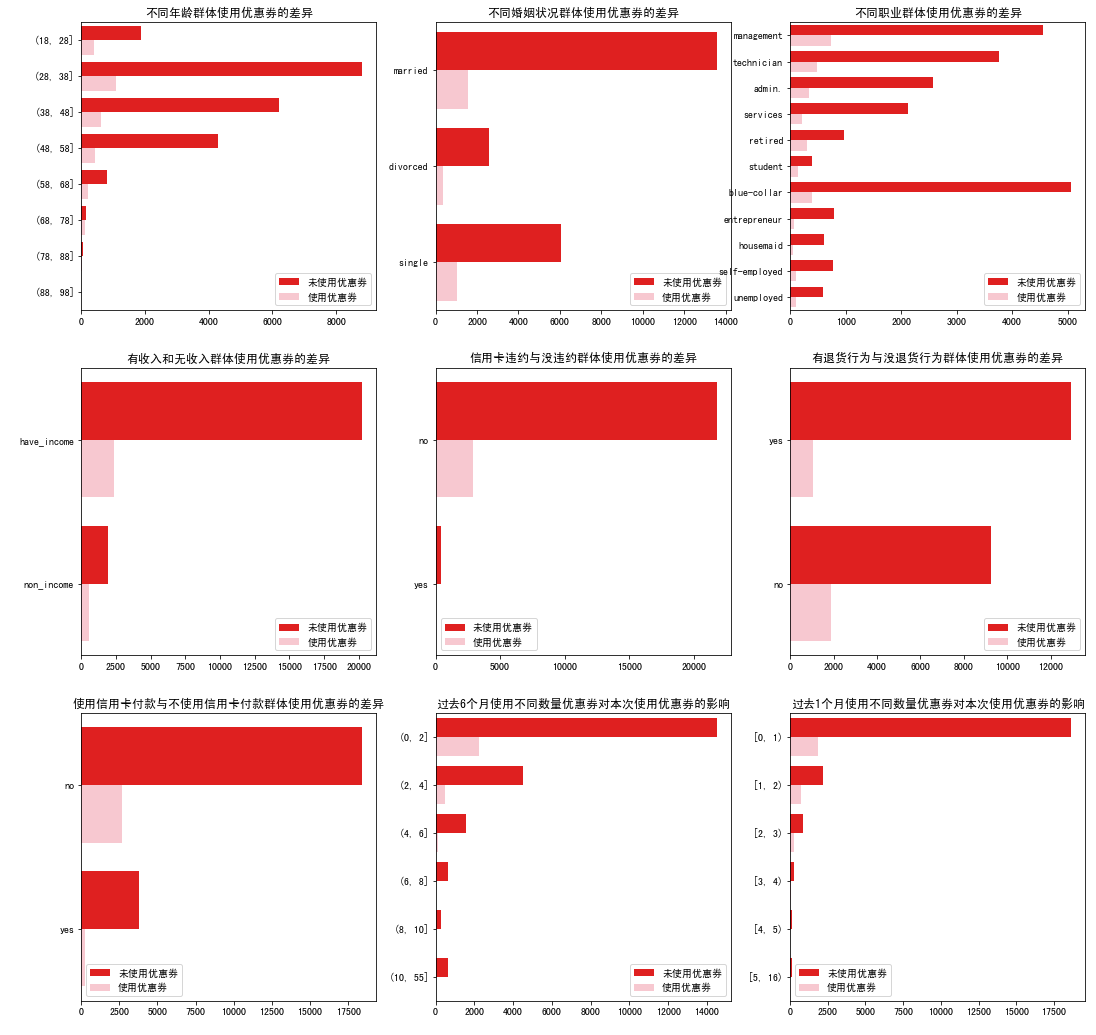

In [30]:
# 先观察各个变量的不同分组中，哪个组的优惠券使用率更高

# 不同年龄群体使用优惠券的差异
# 增加新变量'age_new'，将年龄以10为间隔分组
plt.figure(figsize=(18,18))
plt.subplot(331)
bins = range(18,99,10)
pdd['age_new'] = pd.cut(pdd['age'],bins=bins)
sns.countplot(y='age_new', hue='coupon_ind', data=pdd, palette=('red', 'pink'))
plt.title('不同年龄群体使用优惠券的差异')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(['未使用优惠券','使用优惠券'],loc=4)

# 不同婚姻状况群体使用优惠券的差异
plt.subplot(332)
sns.countplot(y='marital', hue='coupon_ind', data=pdd, palette=('red', 'pink'))
plt.title('不同婚姻状况群体使用优惠券的差异')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(['未使用优惠券','使用优惠券'],loc=4)

# 不同职业群体使用优惠券的差异
plt.subplot(333)
sns.countplot(y='job', hue='coupon_ind', data=pdd,palette=('red', 'pink'))
plt.title('不同职业群体使用优惠券的差异')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(['未使用优惠券','使用优惠券'],loc=4)

# 有收入和无收入群体使用优惠券的差异
# 考虑到是否有收入可能会对优惠券使用行为产生差异，构建衍生变量'job_new',将职业划分为有收入、无收入、未知三个群体
non_income = ['retired','unemployed','student']
pdd['job_new'] = pdd['job'].apply(lambda x:'non_income' if x in non_income else 'have_income')
plt.subplot(334)
sns.countplot(y='job_new', hue='coupon_ind', data=pdd, palette=('red', 'pink'))
plt.title('有收入和无收入群体使用优惠券的差异')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(['未使用优惠券','使用优惠券'],loc=4)

#####################################

# 信用卡违约与没违约群体使用优惠券的差异
plt.subplot(335)
sns.countplot(y='default', hue='coupon_ind', data=pdd, palette=('red', 'pink'))
plt.legend(['未使用优惠券','使用优惠券'])
plt.title('信用卡违约与没违约群体使用优惠券的差异')
plt.xlabel(' ')
plt.ylabel(' ')

# 有退货行为与没退货行为群体使用优惠券的差异
plt.subplot(336)
sns.countplot(y='returned', hue='coupon_ind', data=pdd, palette=('red', 'pink'))
plt.legend(['未使用优惠券','使用优惠券'])
plt.title('有退货行为与没退货行为群体使用优惠券的差异')
plt.xlabel(' ')
plt.ylabel(' ')

# 使用信用卡付款与不使用信用卡付款群体使用优惠券的差异
plt.subplot(337)
sns.countplot(y='loan', hue='coupon_ind', data=pdd, palette=('red', 'pink'))
plt.legend(['未使用优惠券','使用优惠券'])
plt.title('使用信用卡付款与不使用信用卡付款群体使用优惠券的差异')
plt.xlabel(' ')
plt.ylabel(' ')

#######################################

# 过去6个月使用不同数量优惠券对本次使用优惠券的影响
# 通过value_counts()观察变量，发现80%以上的数据主要集中在10次以内，因此对该变量重新分组
plt.subplot(338)
pdd['coupon_used_in_last6_month_new'] = pd.cut(pdd['coupon_used_in_last6_month'], bins=[0,2,4,6,8,10,55])
sns.countplot(y='coupon_used_in_last6_month_new',hue='coupon_ind',data=pdd, palette=('red', 'pink'))
plt.title('过去6个月使用不同数量优惠券对本次使用优惠券的影响')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(['未使用优惠券','使用优惠券'])

# 过去1个月使用不同数量优惠券对本次使用优惠券的影响
# 通过value_counts()观察变量，发现80%以上的数据主要集中在5次以内，因此对该变量重新分组
plt.subplot(339)
pdd['coupon_used_in_last_month_new'] = pd.cut(pdd['coupon_used_in_last_month'], bins=[0,1,2,3,4,5,16], right=False)
sns.countplot(y='coupon_used_in_last_month_new',hue='coupon_ind',data=pdd, palette=('red', 'pink'))
plt.title('过去1个月使用不同数量优惠券对本次使用优惠券的影响')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(['未使用优惠券','使用优惠券'])

### 4.5.2 相关分析
分类变量不能直接进行相关分析，需处理为哑变量

这里将原变量和衍生变量都进行了哑变量处理，目的是希望得到更多的可选择变量，通过与目标变量的相关分析，找出相关性更高变量进行后续建

In [20]:
# 哑变量处理
df = pd.get_dummies(pdd)
# 相关分析，并将结果保存在变量a中
a = df.corr()[['coupon_ind']]
# 新增一列，将相关系数取绝对值，并按照绝对值大小排序
a['abs(coef)'] = abs(a['coupon_ind'])
a.sort_values('abs(coef)', ascending=False)

,coupon_ind,abs(coef)
coupon_ind,1.000000,1.000000
"coupon_used_in_last_month_new_[0, 1)",-0.169827,0.169827
"coupon_used_in_last_month_new_[1, 2)",0.144722,0.144722
returned_no,0.144257,0.144257
returned_yes,-0.144257,0.144257
coupon_used_in_last_month,0.115268,0.115268
job_new_have_income,-0.108163,0.108163
job_new_non_income,0.108163,0.108163
"age_new_(68, 78]",0.101480,0.101480
job_retired,0.084192,0.084192


##### 小结

变量的选择还是以原来的8个自变量为基础、以各自的衍生作为补充；
主要选择相关系数的绝对值在0.1以上的变量纳入模型

1. coupon_used_in_last_month相关性相对较高，该变量与其两个衍生分组变量的相关性绝对值都在0.144及以上。一般同类变量（包括衍生分组变量）只要纳入一个即可，因此选择'coupon_used_in_last_month_new_[0, 1)'纳入模型；
2. returned变量与目标变量具有相关性，选择纳入returned_no变量（returned_yes与该变量本质是同一个变量，只是符号相反）；
3. job变量与目标变量具有相关性，选择纳入job_new_non_income变量；
4. age变量与目标变量相关性较弱，原变量及衍生变量仅有age_new_(68, 78]相关性在0.1以上，考虑在模型优化中将age_new_(68, 78]纳入，根据模型评估指标决定去留；
5. 其余loan、marital、coupon_used_in_last6_month、default等变量及其衍生变量均与目标变量的相关性较小，不考虑纳入模型；

## 4.6 数据建模

### 4.6.1 建模数据准备

逻辑回归对数据标准化没有要求，因此不对数据进行标准化处理

In [37]:
# 将自变量和因变量分别存入x和y
x = df[['coupon_used_in_last_month_new_[0, 1)','returned_no','job_new_non_income']]
y = df['coupon_ind']

# 训练集与测试集拆分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)

### 4.6.2 建模训练

In [38]:
# 调包
from sklearn.linear_model import LogisticRegression
# 模型实例化
lr = LogisticRegression()
# 训练模型
lr.fit(x_train, y_train)

# 输出截距与变量系数
print('模型截距：', lr.intercept_)
print('模型系数：', lr.coef_)

模型截距： [-1.71955696]
模型系数： [[-1.17750583  0.95882332  0.47473601]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.6.3 模型评估

#### 4.6.3.1 模型拟合评估

In [39]:
# 用模型预测x_train，将结果保存在y_train_predict中
y_train_predict = lr.predict(x_train)

# 评估模型准确性，并保存在train_accuracy中
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_predict)
print('train_accuracy:', train_accuracy)

train_accuracy: 0.8835122394502186


#### 4.6.3.2 模型预测能力评估

In [40]:
# 用模型预测x_test，将结果保存在y_test_predict中
y_test_predict = lr.predict(x_test)

# 评估模型准确性，并保存在test_accuracy中
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_predict)
print('test_accuracy:', test_accuracy)

test_accuracy: 0.8820723466277991


#### 4.6.3.3 保存模型评估结果

将原始模型及后续优化模型的评估结果进行保存，便于最后对各个模型比较

In [41]:
model1_assess = [train_accuracy,test_accuracy]

### 4.6.4 模型优化

#### 4.6.4.1 Model_2，改变训练集和测试集的比例，验证模型稳健性

模型的稳健性主要通过改变训练集和测试集，检验模型的准确率是否稳定。通常检验稳定性的方法包括：
1. 改变训练集和测试集的比例
2. 改变随机数种子
3. 采用十折交叉验证

这里采用第一种方法，改变训练集和测试集的比例

In [42]:
# 训练集与测试集从三七开改为五五开
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=100)

# 训练模型
lr.fit(x_train, y_train)

# 输出截距与变量系数
print('模型截距：', lr.intercept_)
print('模型系数：', lr.coef_)

# 用模型预测x_train，将结果保存在y_train_predict中
y_train_predict = lr.predict(x_train)

# 评估模型准确性，并保存在train_accuracy中
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_predict)
print('train_accuracy:', train_accuracy)

# 用模型预测x_test，将结果保存在y_test_predict中
y_test_predict = lr.predict(x_test)

# 评估模型准确性，并保存在test_accuracy中
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_predict)
print('test_accuracy:', test_accuracy)

# 保存评估结果
model2_assess = [train_accuracy,test_accuracy]

模型截距： [-1.69680618]
模型系数： [[-1.15830095  0.90916612  0.50338311]]
train_accuracy: 0.8828019400492964
test_accuracy: 0.8833585115687366


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 4.6.4.2 Model_3，将备选变量'age_new_(68, 78]'纳入模型

这里训练集和测试集的比例依然是0.3，因为需要与最初的模型进行比较

In [44]:
# 将自变量和因变量分别存入x和y
x = df[['coupon_used_in_last_month_new_[0, 1)','returned_no','job_new_non_income','age_new_(68, 78]']]
y = df['coupon_ind']

# 拆分测试集与训练集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)

# 训练模型
lr.fit(x_train, y_train)

# 输出截距与变量系数
print('模型截距：', lr.intercept_)
print('模型系数：', lr.coef_)

# 用模型预测x_train，将结果保存在y_train_predict中
y_train_predict = lr.predict(x_train)

# 评估模型准确性，并保存在train_accuracy中
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_predict)
print('train_accuracy:', train_accuracy)

# 用模型预测x_test，将结果保存在y_test_predict中
y_test_predict = lr.predict(x_test)

# 评估模型准确性，并保存在test_accuracy中
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_predict)
print('test_accuracy:', test_accuracy)

# 保存评估结果
model3_assess = [train_accuracy,test_accuracy]

模型截距： [-1.72268472]
模型系数： [[-1.16306997  0.94226955  0.38500749  0.77154478]]
train_accuracy: 0.8836258306355427
test_accuracy: 0.881807340665165


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 4.6.4.3 模型比较

In [45]:
# 将三个模型的评估结果保存在model_assess_df中
data = np.array([model1_assess,model2_assess,model3_assess])
model_assess_df = pd.DataFrame(data, index=['Model_1','Model_2','Model_3'], columns=['train_accuracy','test_accuracy'])
model_assess_df

,train_accuracy,test_accuracy
Model_1,0.883512,0.882072
Model_2,0.882802,0.883359
Model_3,0.883626,0.881807


##### 小结：
1. 模型稳健性：调整训练集和测试集比例后，准确率依然保持在0.882以上的水平，说明模型稳健性较高
2. 加入新变量'age_new_(68, 78]'后，模型的训练集准确率提升的幅度非常小（0.000114），测试集的准确率下降相对更多（0.000265），说明该变量加入后，模型拟合程度稍微升高，但是预测能力下降，可能存在过拟合现象。

综上，在充分考虑模型的拟合程度与预测能力之后，选择Model_1作为最优模型，最优模型的拟合程度与预测准确率分别达0.883512和0.882072。

### 4.6.5 Model_1模型解读

In [ ]:
# Model_1公式
logit(p) = log(p/(1-p)) = -1.71955696
                        -1.17750583 * coupon_used_in_last_month_new_[0, 1)  # 变量：上个月使用优惠券数量为0
                        +0.95882332 * returned_no                                      # 变量：没有退货经历
                        +0.47473601 * job_new_non_income                          # 变量：没有工作收入

##### 模型解读：
1. 上个月未使用过优惠券的群体，这次活动使用优惠券的概率，是上个月使用过优惠券的群体的1/3（反过来即，上个月使用优惠券，这次使用的概率，是没有使用过的3倍）；
2. 没有退货经历的群体，这次活动使用优惠券的概率，是有退货经历群体的2.61倍；
3. 没有收入的群体，这次活动使用优惠券的概率，是有收入群体的1.61倍。